<a href="https://colab.research.google.com/github/i-ninte/data-analytics-R-python/blob/main/BA_REVIEWS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests


In [ ]:
pip install beautifulsoup4


British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.


##Scrape data from the web
  The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax[https://www.airlinequality.com/]

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data.

##Analyse data
Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.



##Present insights
Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide.

#DATA COLLECTION

In [48]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
page_size=100
# Create empty lists to collect reviews and other information
reviews = []
stars = []
date = []
country = []
traveler_type = []
seat_type = []
seat_comfort = []
cabin_staff_service = []
food_and_beverages = []
inflight_environment = []
ground_service = []
wifi_and_internet = []

for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}")
    soup = BeautifulSoup(page.content, "html5")
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    # Rating
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print("Error on page:", i)
            stars.append("None")

    # Date
    for item in soup.find_all("time"):
        date.append(item.text)

    # Country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

    # Additional information
    for item in soup.find_all("tr"):
        if "Type Of Traveller" in item.text:
            traveler_type.append(item.find("td").text)
        if "Seat Type" in item.text:
            seat_type.append(item.find("td").text)
        if "Seat Comfort" in item.text:
            seat_comfort.append(item.find("td").text)
        if "Cabin Staff Service" in item.text:
            cabin_staff_service.append(item.find("td").text)
        if "Food & Beverages" in item.text:
            food_and_beverages.append(item.find("td").text)
        if "Inflight Entertainment" in item.text:
            inflight_environment.append(item.find("td").text)
        if "Ground Service" in item.text:
            ground_service.append(item.find("td").text)
        if "Wifi & Internet" in item.text:
            wifi_and_internet.append(item.find("td").text)



Error on page: 32
Error on page: 33
Error on page: 33
Error on page: 35


In [ ]:
#check the length of the total reviews
len(reviews)

3500

In [ ]:
len(country)

3500

In [49]:
#check length  of stars
stars = stars[:3500]


In [ ]:
len(stars)

3500

In [ ]:
len(traveler_type)

2911

In [ ]:
len(seat_type)

3498

In [ ]:
len(seat_comfort)

3420

In [ ]:
len(cabin_staff_service)

3374

In [ ]:
len(food_and_beverages)

3155

In [ ]:
len(inflight_environment)

2405

In [ ]:
len(ground_service)

2836

In [ ]:
len(wifi_and_internet)

0

In [ ]:
# Determine the list with the least length
min_length = min(len(stars), len(traveler_type), len(seat_type), len(seat_comfort), len(cabin_staff_service), len(food_and_beverages), len(inflight_environment), len(ground_service))

# Extend the lists to be the same length (3500) with zeros as placeholders
stars = stars[:min_length] + [0] * (3500 - min_length)
traveler_type = traveler_type[:min_length] + [0] * (3500 - min_length)
seat_type = seat_type[:min_length] + [0] * (3500 - min_length)
seat_comfort = seat_comfort[:min_length] + [0] * (3500 - min_length)
cabin_staff_service = cabin_staff_service[:min_length] + [0] * (3500 - min_length)
food_and_beverages = food_and_beverages[:min_length] + [0] * (3500 - min_length)
inflight_environment = inflight_environment[:min_length] + [0] * (3500 - min_length)
ground_service = ground_service[:min_length] + [0] * (3500 - min_length)


In [50]:
# Create a DataFrame from the collected data
df = pd.DataFrame({
    "reviews": reviews,
    "stars": stars,
    "date": date,
    "country": country,

})




In [51]:

df.to_csv("BA_reviews.csv")

In [52]:
df= pd.read_csv("BA_reviews.csv",index_col=0)

In [53]:
df.shape

(3500, 4)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | I have been using BA for a ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,United Kingdom
1,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom
2,Not Verified | I have flow on BA several time...,1,19th October 2023,United States
3,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom
4,✅ Trip Verified | I hate British Airways! We...,1,17th October 2023,United States


In [ ]:
df.tail()

,reviews,stars,date,country
3495,BA2262 on 17th Feb 2014. I was in 4A from Jama...,5,29th July 2014,United Kingdom
3496,DME-LHR July 23 Club World seat 64A. It was qu...,1,29th July 2014,United Kingdom
3497,LHR-DME on 19 July seat 1A Club World. I flew ...,9,29th July 2014,United Kingdom
3498,BA206 from Miami to LHR on upper deck dinner t...,7,29th July 2014,United Kingdom
3499,I have used BA over the past 20 years as I cho...,1,29th July 2014,Canada


#DATA CLEANING

creating a column for verification

In [54]:
df['verified']=df.reviews.str.contains("trip verified")

In [55]:
df['verified']

0       False
1       False
2       False
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

cleaning reviews

In [56]:
df.head()

,reviews,stars,date,country,verified
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands,False
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom,False
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom,False
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States,False
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom,False


In [57]:
import nltk


In [58]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemma= WordNetLemmatizer()


reviews_data= df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus=[]

#loop though each review, rename punctuations,small case it, join it and it to corpus
for rev  in reviews_data:
  rev = re.sub('[^a-zA-Z]', ' ',rev)
  rev= rev.lower()
  rev= rev.split()
  rev= [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
  rev=" ".join(rev)
  corpus.append(rev)

In [61]:
#add the corpus to the original dataframe
df['corpus']= corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom,False,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom,False,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom,False,flight departed hour late due late inbound pla...


##cleaning / fomatting date

In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [62]:
#convert the date to datetime format
df.date= pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2023-10-21
1   2023-10-21
2   2023-10-19
3   2023-10-19
4   2023-10-17
Name: date, dtype: datetime64[ns]

In [ ]:
df.dtypes

reviews             object
stars               object
date        datetime64[ns]
country             object
verified              bool
corpus              object
dtype: object

##cleaning ratings with stars

In [63]:
#checking for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '4', '1', '5', '2', '10',
       '6', '8', '7', '9', 'None'], dtype=object)

In [64]:
#remove the \t and \n fromthe ratings
df.stars= df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [65]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,5,2023-10-21,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,2023-10-21,United Kingdom,False,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,2023-10-19,United Kingdom,False,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,2023-10-19,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,2023-10-17,United Kingdom,False,flight departed hour late due late inbound pla...


In [66]:
df.stars.value_counts()

1       839
2       406
3       389
8       340
10      293
9       285
7       284
5       251
4       240
6       170
None      3
Name: stars, dtype: int64

In [67]:
df.stars.unique()

array(['5', '3', '4', '1', '2', '10', '6', '8', '7', '9', 'None'],
      dtype=object)

##checking for nulls

In [68]:
df.isnull().sum()

reviews     0
stars       0
date        0
country     2
verified    0
corpus      0
dtype: int64

we have 2 nulls in the country column

In [69]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [70]:
df.shape

(3498, 6)

In [71]:
#resrtting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,5,2023-10-21,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,2023-10-21,United Kingdom,False,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,2023-10-19,United Kingdom,False,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,2023-10-19,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,2023-10-17,United Kingdom,False,flight departed hour late due late inbound pla...
...,...,...,...,...,...,...
3493,Flight BA274 LAS-LHR on 8/6/2014 onboard G-CIV...,8,2014-07-29,Netherlands,False,flight ba la lhr onboard g civb b flight time ...
3494,BA2262 on 17th Feb 2014. I was in 4A from Jama...,5,2014-07-29,United Kingdom,False,ba th feb jamaica london gatwick need climb an...
3495,DME-LHR July 23 Club World seat 64A. It was qu...,1,2014-07-29,United Kingdom,False,dme lhr july club world seat quite novelty tra...
3496,LHR-DME on 19 July seat 1A Club World. I flew ...,9,2014-07-29,United Kingdom,False,lhr dme july seat club world flew one converte...


In [72]:
df.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
corpus      0
dtype: int64

#Exploratory Data Analysis

In [73]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [74]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,5,2023-10-21,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,2023-10-21,United Kingdom,False,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,2023-10-19,United Kingdom,False,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,2023-10-19,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,2023-10-17,United Kingdom,False,flight departed hour late due late inbound pla...


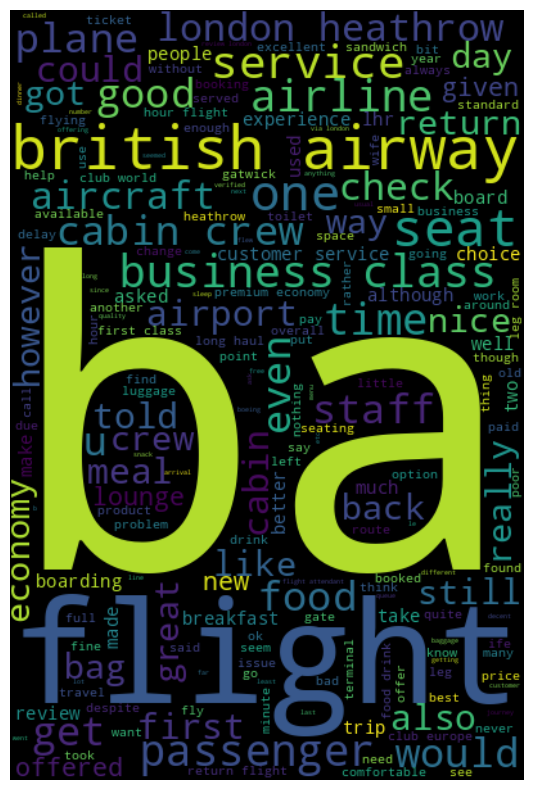

In [76]:
import nltk
from nltk.corpus import stopwords

#start with a review
reviews= " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords= set(stopwords.words("english"))

#create and generate a word cloud image:
wordcloud =WordCloud(height=600, max_font_size=500, stopwords=stopwords).generate(reviews)


#displaying the generated image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

there are many  words in the wordcloud but then not all of them tell us about how positive or negative the flight was

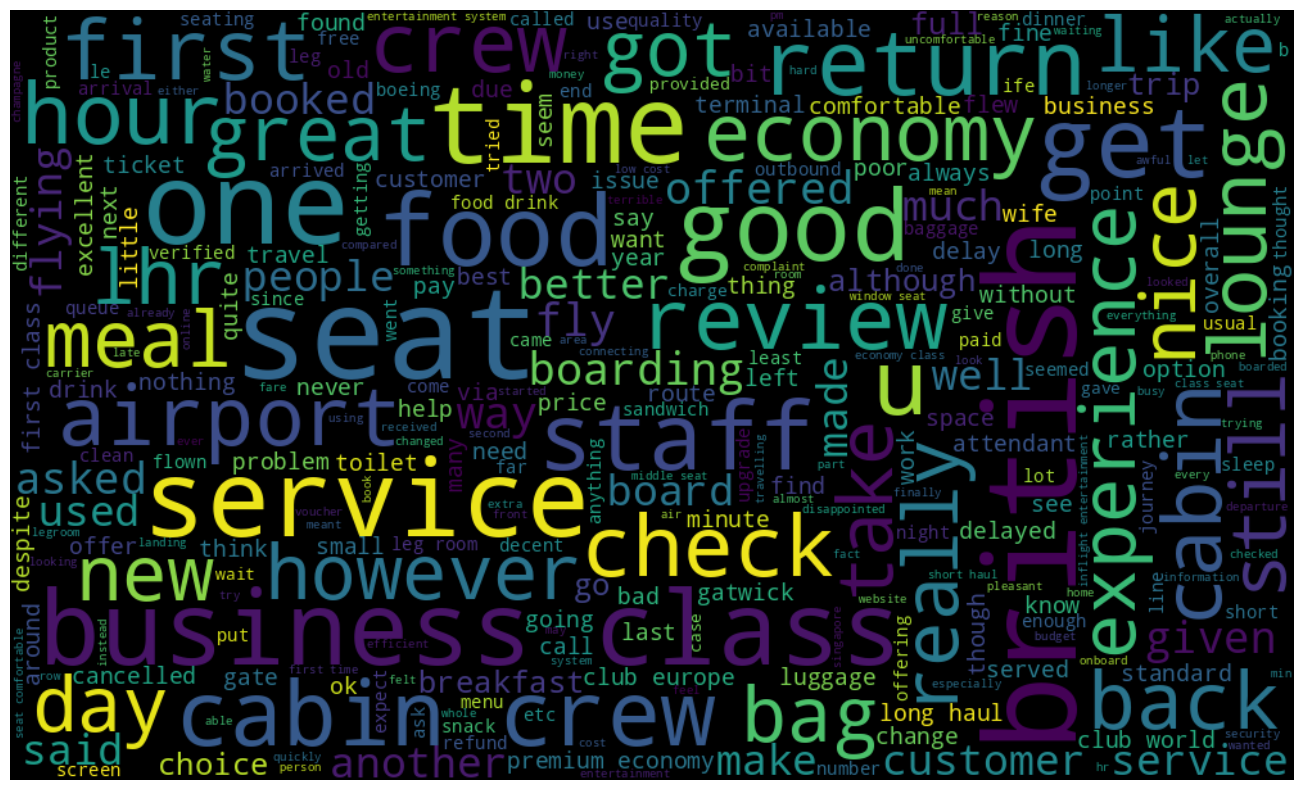

In [77]:
import nltk
from nltk.corpus import stopwords

#start with a review
reviews= " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords= set(stopwords.words("english"))
stopwords.update(['ba','flight','airway','airline','plane','told','also','took','passenger','london','heathrow','aircraft','could','even','would'])
#create and generate a word cloud image:
wordcloud =WordCloud(height=600, width=1000,max_font_size=100,max_words=300, stopwords=stopwords).generate(reviews)


#displaying the generated image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()